<a href="https://colab.research.google.com/github/Herzanet002/ML2023/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install visualkeras pydot pydotplus graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 14.5 MB/s eta 0:00:00


In [30]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
import visualkeras

In [2]:
train_df = pd.read_csv('/content/sample_data/sign_mnist_train.csv')
test_df = pd.read_csv('/content/sample_data/sign_mnist_test.csv')
print(len(train_df))
print(len(test_df))

27455
7172


In [3]:
y_train = train_df['label']
y_test = test_df['label']

x_train = train_df.drop('label',axis=1)
x_train = np.array(x_train,dtype='float32')/255

x_test = test_df.drop('label',axis=1)
x_test = np.array(x_test,dtype='float32')/255

print('x_train : {}\n'.format(x_train[:]))
print('Y-train shape: {}\n'.format(y_train))
print('x_test shape: {}'.format(x_test.shape))

x_train : [[0.41960785 0.4627451  0.49803922 ... 0.8        0.79607844 0.7921569 ]
 [0.60784316 0.6156863  0.6117647  ... 0.40392157 0.5294118  0.58431375]
 [0.73333335 0.7372549  0.7372549  ... 0.7647059  0.7607843  0.7647059 ]
 ...
 [0.68235296 0.68235296 0.68235296 ... 0.7921569  0.78431374 0.78431374]
 [0.69411767 0.70980394 0.72156864 ... 0.2509804  0.34117648 0.3647059 ]
 [0.7019608  0.7058824  0.7058824  ... 0.8039216  0.81960785 0.84313726]]

Y-train shape: 0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64

x_test shape: (7172, 784)


In [11]:
x_train, x_valid, y_train, y_valid= train_test_split(x_train, y_train, test_size=.05, random_state=1234,)

In [12]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [13]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

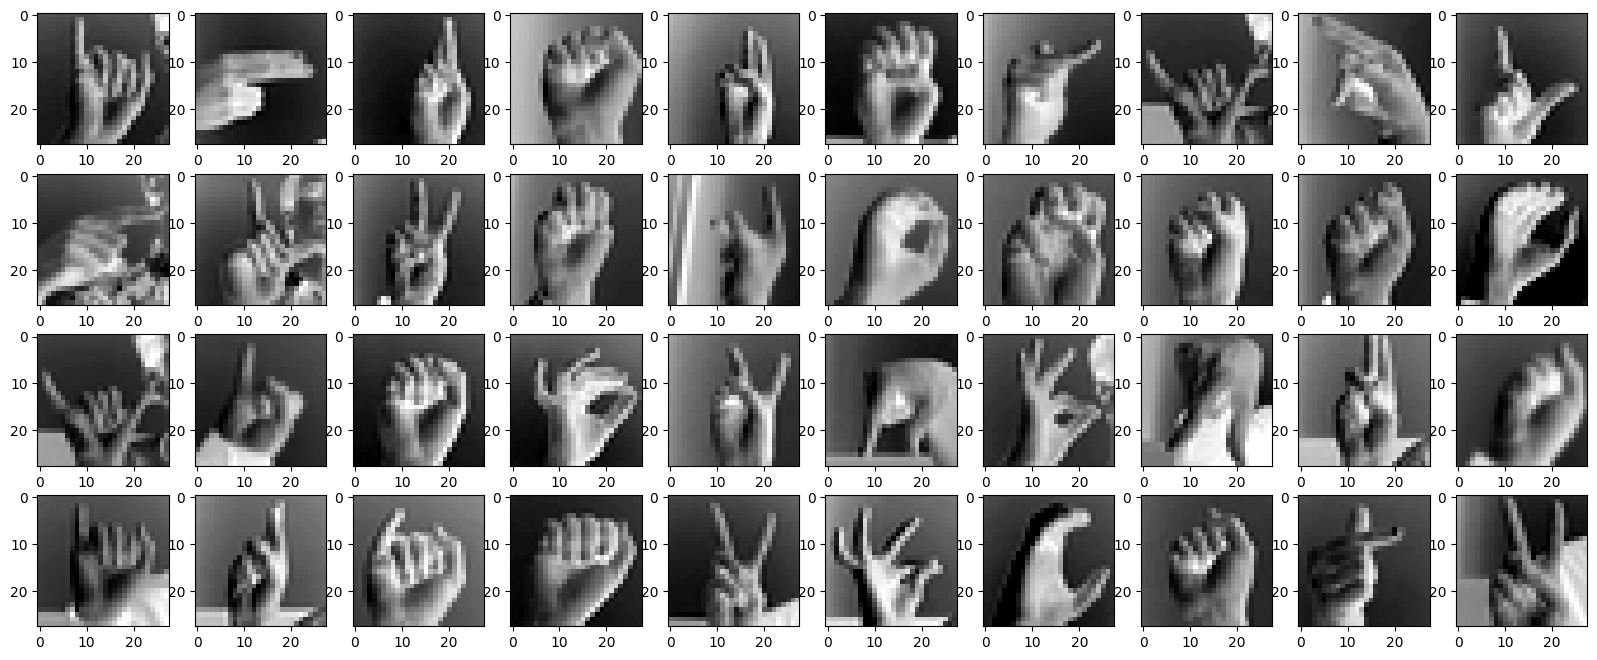

In [17]:
plt.figure(figsize=(20, 8))
x, y = 10, 4 
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray_r')
plt.show()

In [18]:
imageGen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.2,
        width_shift_range=0.1,
        height_shift_range=0.1)

imageGen.fit(x_train)

In [19]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1, factor=0.5, min_lr=0.00001)

In [20]:
model = Sequential()
model.add(Conv2D(45, kernel_size=(3,3), activation='relu', input_shape=(28,28,1), strides = 1, padding = 'same'))

model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides = 2, padding = 'same'))

model.add(Conv2D(55, kernel_size=(3,3), strides=1, padding='same', activation='relu'))

model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(units=24,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 45)        450       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 45)       180       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 45)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 55)        22330     
                                                                 
 dropout (Dropout)           (None, 14, 14, 55)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 55)       2

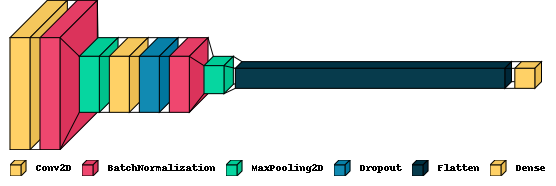

In [31]:
visualkeras.layered_view(model, legend = True)

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
EPOCHS = 10
BATCH_SIZE = 128
hist= model.fit(imageGen.flow(x_train, y_train, batch_size=BATCH_SIZE), epochs=EPOCHS, validation_data = (x_test,y_test), callbacks = [learning_rate_reduction])
print("Accuracy:" , model.evaluate(x_test,y_test)[1] * 100 , "%")

Epoch 1/10
184/184 [==============================] - 106s 562ms/step - loss: 1.4759 - accuracy: 0.5571 - val_loss: 3.0429 - val_accuracy: 0.0559 - lr: 0.0010
Epoch 2/10
184/184 [==============================] - 73s 395ms/step - loss: 0.6226 - accuracy: 0.7962 - val_loss: 2.1821 - val_accuracy: 0.2966 - lr: 0.0010
Epoch 3/10
184/184 [==============================] - 70s 381ms/step - loss: 0.3871 - accuracy: 0.8748 - val_loss: 0.3613 - val_accuracy: 0.9318 - lr: 0.0010
Epoch 4/10
184/184 [==============================] - 69s 377ms/step - loss: 0.2846 - accuracy: 0.9081 - val_loss: 0.0841 - val_accuracy: 0.9839 - lr: 0.0010
Epoch 5/10
184/184 [==============================] - 71s 384ms/step - loss: 0.2370 - accuracy: 0.9239 - val_loss: 0.0561 - val_accuracy: 0.9854 - lr: 0.0010
Epoch 6/10
184/184 [==============================] - 69s 374ms/step - loss: 0.1817 - accuracy: 0.9413 - val_loss: 0.0196 - val_accuracy: 0.9977 - lr: 0.0010
Epoch 7/10
184/184 [==============================]

KeyboardInterrupt: ignored

In [34]:
print("Accuracy:" , model.evaluate(x_test,y_test)[1] * 100 , "%")

41/41 [==============================] - 1s 36ms/step - loss: 0.0076 - accuracy: 0.9992
Accuracy: 99.92337226867676 %
